# Week4授業課題 信用情報を学習しよう

## 課題：パイプライン、指標値の関数、前処理、Feature Engineering、学習

[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk "Home Credit Default Risk | Kaggle")

Week3でEDAを行ったKaggleのHome Credit Default Riskコンペティションの学習および推定を行う。

In [6]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn import metrics



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [7]:
# train.csvの読み込み
df_train = pd.read_csv("application_train.csv")

In [8]:
df_test = pd.read_csv("application_test.csv")

In [9]:
#学習データの情報表示
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
#特徴量の要約統計量の表示
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
# 各特徴量のデータ総数
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [12]:
# 欠損値があるデータをカウント
Total = df_train.isnull().sum()
# 欠損値の割合を算出
missing_rate = Total / len(df_train)

#　テーブルにカウントした欠損値と割合を格納
missing_table = pd.DataFrame({
    'Total': Total,
    'missing_rate': missing_rate
})

#欠損値の割合が大きい順にソートする
missing_table.sort_values(by='missing_rate', ascending=False)

,Total,missing_rate
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


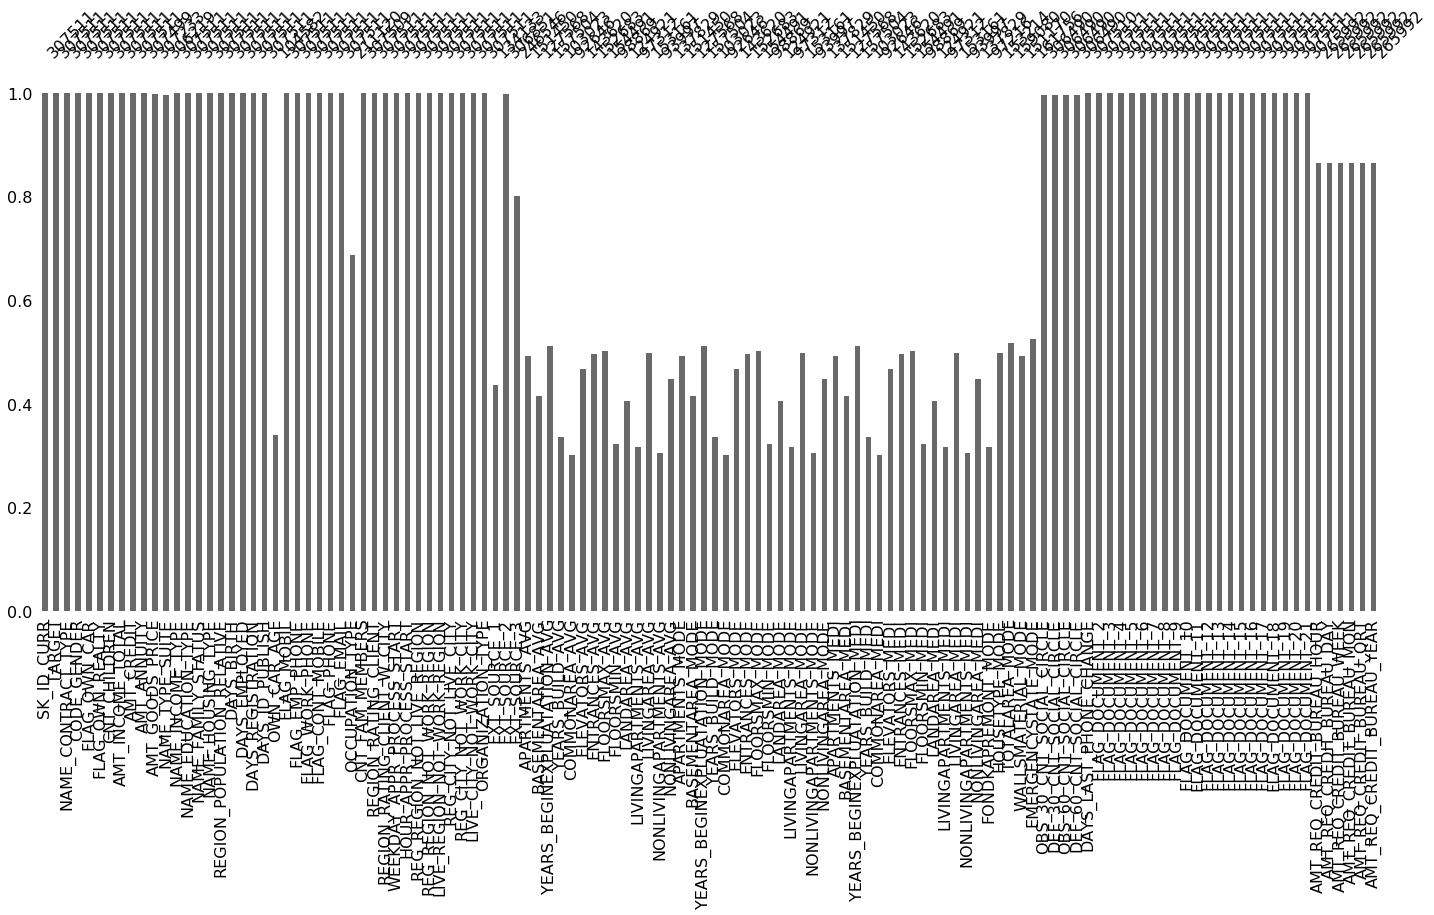

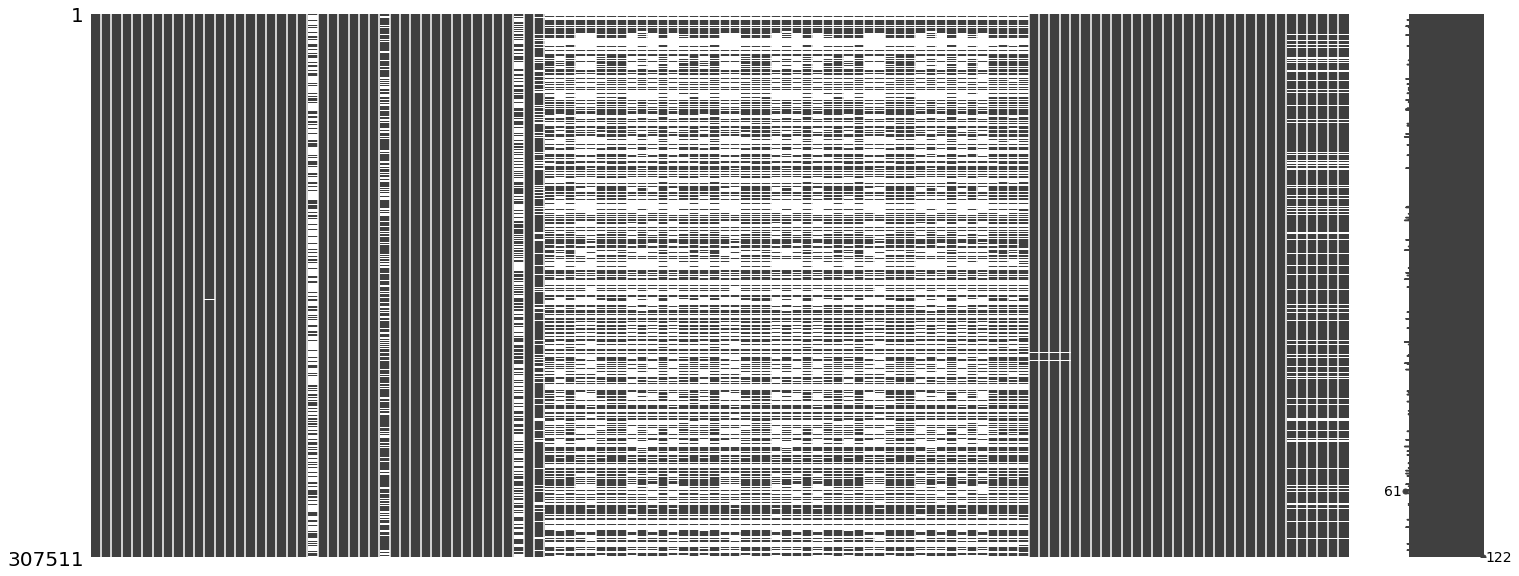

In [13]:
#missingnoモジュールのインポート
import missingno as msno

#欠損値の有無をバーとして表示
#バーが1.0に満たない特徴量に欠損値が発生していると確認できる
msno.bar(df_train)
plt.show()
msno.matrix(df_train)
plt.show()

In [14]:
df_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
# カテゴリ変数において、各変数の取りうる値の数を計算
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [16]:
# 上記で2個はlabel-encoding

def df_labelencoder(df):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in df:
        if df[col].dtype == 'object':
            if len(list(df[col].unique())) <= 2:
                le.fit(df[col])
                df[col] = le.transform(df[col])

df_labelencoder(df_train)
df_labelencoder(df_test)

# 3個以上はone-hot-encoding
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print('df_train shape: ', df_train.shape)
print('df_test shape: ', df_test.shape)

df_train shape:  (307511, 243)
df_test shape:  (48744, 238)


In [17]:
# 訓練データとテストデータの両方にある列のみ残し、訓練データには目的変数を残す
train_labels = df_train['TARGET']
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)
df_train['TARGET'] = train_labels

print('df_train shape: ', df_train.shape)
print('df_test shape: ', df_test.shape)

df_train shape:  (307511, 238)
df_test shape:  (48744, 237)


In [18]:
# 目的変数との相関係数をみる
correlations = df_train.corr()['TARGET'].sort_values()
correlations

EXT_SOURCE_3                                        -0.178919
EXT_SOURCE_2                                        -0.160472
EXT_SOURCE_1                                        -0.155317
NAME_EDUCATION_TYPE_Higher education                -0.056593
NAME_INCOME_TYPE_Pensioner                          -0.046209
ORGANIZATION_TYPE_XNA                               -0.045987
DAYS_EMPLOYED                                       -0.044932
FLOORSMAX_AVG                                       -0.044003
FLOORSMAX_MEDI                                      -0.043768
FLOORSMAX_MODE                                      -0.043226
EMERGENCYSTATE_MODE_No                              -0.042201
HOUSETYPE_MODE_block of flats                       -0.040594
AMT_GOODS_PRICE                                     -0.039645
REGION_POPULATION_RELATIVE                          -0.037227
ELEVATORS_AVG                                       -0.034199
ELEVATORS_MEDI                                      -0.033863
FLOORSMI

上記より、目的変数と正の相関が高い"DAYS_BIRTH","DAYS_EMPLOYED"、負の相関が高い"EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"のそれぞれの異常値・欠損値を次から中心に見ていく。

In [19]:
# まずは"DAYS_EMPLOYED"をみる
print("------DAYS_EMPLOYED------\n")
(df_train['DAYS_EMPLOYED']).describe()

------DAYS_EMPLOYED------



count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

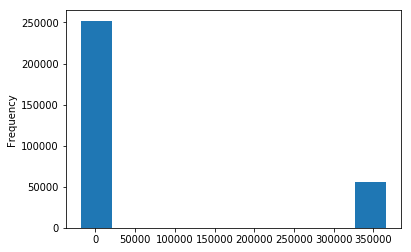

In [20]:
# DAYS_EMPLOYEDに外れ値があり、分布に異常あり
df_train['DAYS_EMPLOYED'].plot.hist()

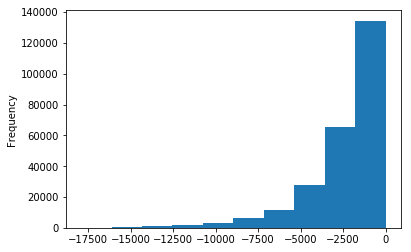

In [21]:
# 外れ値のフラグ列を作る
df_train['DAYS_EMPLOYED_OUTLIERS'] = df_train["DAYS_EMPLOYED"] == 365243

# 外れ値はnanで置換
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
df_train['DAYS_EMPLOYED'].plot.hist()

In [22]:
df_train["DAYS_EMPLOYED"].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [23]:
# テストデータにも同様の処理
df_test['DAYS_EMPLOYED_OUTLIERS'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [24]:
# "DAYS_EMPLOYED_OUTLIERS"と相関のある特徴量をみる
correlations = df_train.corr()['DAYS_EMPLOYED_OUTLIERS'].sort_values()
correlations

FLAG_EMP_PHONE                                      -0.999868
DAYS_BIRTH                                          -0.619947
NAME_INCOME_TYPE_Working                            -0.484189
DAYS_ID_PUBLISH                                     -0.273633
NAME_INCOME_TYPE_Commercial associate               -0.258217
REG_CITY_NOT_WORK_CITY                              -0.256454
ORGANIZATION_TYPE_Business Entity Type 3            -0.249686
FLAG_DOCUMENT_3                                     -0.248508
CNT_CHILDREN                                        -0.240722
CNT_FAM_MEMBERS                                     -0.233981
FLAG_WORK_PHONE                                     -0.233834
LIVE_CITY_NOT_WORK_CITY                             -0.219234
OCCUPATION_TYPE_Laborers                            -0.219164
DAYS_REGISTRATION                                   -0.212417
ORGANIZATION_TYPE_Self-employed                     -0.177057
OCCUPATION_TYPE_Sales staff                         -0.159997
FLAG_OWN

"FLAG_EMP_PHONE"（会社用電話があったか）で極めて低値、"NAME_INCOME_TYPE_Pensioner"（年金受給者）で極めて高値。"DAYS_EMPLOYED_OUTLIERS"の人は無職の年金受給者（高齢者）とわかるが、上記より"TARGET"との相関はほぼないので、"DAYS_EMPLOYED"の欠損値は中央値で埋める。

In [25]:
df_train["DAYS_EMPLOYED"] = df_train["DAYS_EMPLOYED"].fillna(df_train["DAYS_EMPLOYED"].median())
df_test["DAYS_EMPLOYED"] = df_test["DAYS_EMPLOYED"].fillna(df_test["DAYS_EMPLOYED"].median())

In [26]:
# "DAYS_BIRTH"の欠損値はなし
df_train["DAYS_BIRTH"].isnull().sum() + df_test["DAYS_BIRTH"].isnull().sum()

0

In [27]:
# 理解しやすいように絶対値にしておく
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_test['DAYS_BIRTH'] = abs(df_test['DAYS_BIRTH'])

In [28]:
# EXT_SOURCEについて
df_train[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [29]:
# EXT_SOURCEの欠損値の各列を新たに作り、相関のある特徴量をみる
df_train["EXT_SOURCE_1_OUTLIERS"] = df_train["EXT_SOURCE_1"].isnull()
df_train["EXT_SOURCE_2_OUTLIERS"] = df_train["EXT_SOURCE_2"].isnull()
df_train["EXT_SOURCE_3_OUTLIERS"] = df_train["EXT_SOURCE_3"].isnull()
correlations = df_train.corr()

# "EXT_SOURCE_1_OUTLIERS"と相関のある特徴量をみる
correlations["EXT_SOURCE_1_OUTLIERS"].sort_values()

FLAG_EMP_PHONE                                      -0.192703
FLAG_EMAIL                                          -0.147304
NAME_EDUCATION_TYPE_Higher education                -0.127746
DAYS_REGISTRATION                                   -0.123604
CNT_CHILDREN                                        -0.112907
CNT_FAM_MEMBERS                                     -0.095716
OCCUPATION_TYPE_Core staff                          -0.075247
OCCUPATION_TYPE_Accountants                         -0.075015
NAME_INCOME_TYPE_Commercial associate               -0.072582
NAME_INCOME_TYPE_Working                            -0.066443
ORGANIZATION_TYPE_Business Entity Type 3            -0.063547
OCCUPATION_TYPE_Managers                            -0.058928
AMT_ANNUITY                                         -0.057880
DAYS_ID_PUBLISH                                     -0.057243
EXT_SOURCE_2                                        -0.054732
NAME_EDUCATION_TYPE_Incomplete higher               -0.051819
FLAG_WOR

In [30]:
# "EXT_SOURCE_2_OUTLIERS"と相関のある特徴量をみる
correlations["EXT_SOURCE_2_OUTLIERS"].sort_values()

FLAG_MOBIL                                          -0.038883
AMT_GOODS_PRICE                                     -0.015856
AMT_CREDIT                                          -0.015127
AMT_ANNUITY                                         -0.014506
AMT_REQ_CREDIT_BUREAU_YEAR                          -0.011305
DAYS_REGISTRATION                                   -0.007439
AMT_REQ_CREDIT_BUREAU_QRT                           -0.007358
FLAG_EMP_PHONE                                      -0.006789
YEARS_BUILD_AVG                                     -0.006441
YEARS_BUILD_MEDI                                    -0.006424
YEARS_BUILD_MODE                                    -0.006100
FLAG_DOCUMENT_8                                     -0.005836
OCCUPATION_TYPE_Managers                            -0.005766
FLAG_OWN_CAR                                        -0.005706
NAME_HOUSING_TYPE_House / apartment                 -0.005478
NAME_FAMILY_STATUS_Married                          -0.004914
AMT_INCO

In [31]:
# "EXT_SOURCE_3_OUTLIERS"と相関のある特徴量をみる
correlations["EXT_SOURCE_3_OUTLIERS"].sort_values()

EXT_SOURCE_1                                        -0.060414
NAME_FAMILY_STATUS_Married                          -0.048551
AMT_CREDIT                                          -0.044526
EXT_SOURCE_2                                        -0.044220
AMT_GOODS_PRICE                                     -0.044118
DAYS_BIRTH                                          -0.043854
FLAG_OWN_CAR                                        -0.041609
NAME_EDUCATION_TYPE_Higher education                -0.041467
NAME_INCOME_TYPE_State servant                      -0.034194
AMT_REQ_CREDIT_BUREAU_MON                           -0.032286
CNT_FAM_MEMBERS                                     -0.031063
FLAG_PHONE                                          -0.029762
OCCUPATION_TYPE_Managers                            -0.027452
HOUR_APPR_PROCESS_START                             -0.027092
AMT_INCOME_TOTAL                                    -0.026835
NAME_HOUSING_TYPE_House / apartment                 -0.026647
ORGANIZA

In [32]:
# いずれも相関に特徴がないので中央値で埋める
df_train["EXT_SOURCE_1"] = df_train["EXT_SOURCE_1"].fillna(df_train["EXT_SOURCE_1"].median())
df_train["EXT_SOURCE_2"] = df_train["EXT_SOURCE_2"].fillna(df_train["EXT_SOURCE_2"].median())
df_train["EXT_SOURCE_3"] = df_train["EXT_SOURCE_3"].fillna(df_train["EXT_SOURCE_3"].median())
df_test["EXT_SOURCE_1"] = df_test["EXT_SOURCE_1"].fillna(df_test["EXT_SOURCE_1"].median())
df_test["EXT_SOURCE_2"] = df_test["EXT_SOURCE_2"].fillna(df_test["EXT_SOURCE_2"].median())
df_test["EXT_SOURCE_3"] = df_test["EXT_SOURCE_3"].fillna(df_test["EXT_SOURCE_3"].median())

In [33]:
# DAYS_EMPLOYEDを理解しやすいように絶対値にしておく
df_train["DAYS_EMPLOYED"] = abs(df_train["DAYS_EMPLOYED"])
df_test["DAYS_EMPLOYED"] = abs(df_test["DAYS_EMPLOYED"])

In [34]:
# 欠損値を埋めた前項までの特徴量を抽出する。
X_train = df_train[["TARGET","DAYS_BIRTH","DAYS_EMPLOYED","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]
X_test = df_test[["DAYS_BIRTH","DAYS_EMPLOYED","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]
X_train.isnull().sum() + X_test.isnull().sum()

DAYS_BIRTH       0.0
DAYS_EMPLOYED    0.0
EXT_SOURCE_1     0.0
EXT_SOURCE_2     0.0
EXT_SOURCE_3     0.0
TARGET           NaN
dtype: float64

In [35]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (307511, 6)
X_test shape:  (48744, 5)


In [36]:
X_train.head()

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,9461,637.0,0.083037,0.262949,0.139376
1,0,16765,1188.0,0.311267,0.622246,0.535276
2,0,19046,225.0,0.505998,0.555912,0.729567
3,0,19005,3039.0,0.505998,0.650442,0.535276
4,0,19932,3038.0,0.505998,0.322738,0.535276


In [37]:
X_test.head()

,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,19241,2329.0,0.752614,0.789654,0.159520
1,18064,4469.0,0.564990,0.291656,0.432962
2,20038,4458.0,0.506771,0.699787,0.610991
3,13976,1866.0,0.525734,0.509677,0.612704
4,13040,2191.0,0.202145,0.425687,0.519097


In [38]:
# DAYS_BIRTHとの相関が高い。
X_train['DAYS_BIRTH'].corr(X_train['TARGET'])
# 歳を重ねるごとに債務不履行しなくなっていく傾向があるということ。

-0.07823930830982745

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


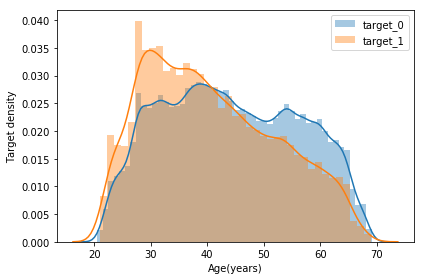

In [39]:
# 年齢構成のヒストグラムを作成
target_0 = X_train["DAYS_BIRTH"][X_train["TARGET"]==0]
target_1 = X_train["DAYS_BIRTH"][X_train["TARGET"]==1]
sns.distplot(target_0/365)
sns.distplot(target_1/365)
plt.xlabel("Age(years)")
plt.ylabel("Target density")
plt.legend(["target_0","target_1"], loc="best")
plt.tight_layout()
plt.show()

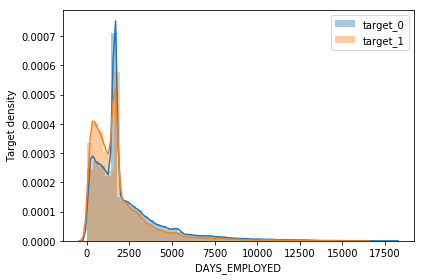

In [40]:
# "DAYS_EMPLOYED"のヒストグラムを作成
target_0 = X_train["DAYS_EMPLOYED"][X_train["TARGET"]==0]
target_1 = X_train["DAYS_EMPLOYED"][X_train["TARGET"]==1]
sns.distplot(target_0)
sns.distplot(target_1)
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel("Target density")
plt.legend(["target_0","target_1"], loc="best")
plt.tight_layout()
plt.show()

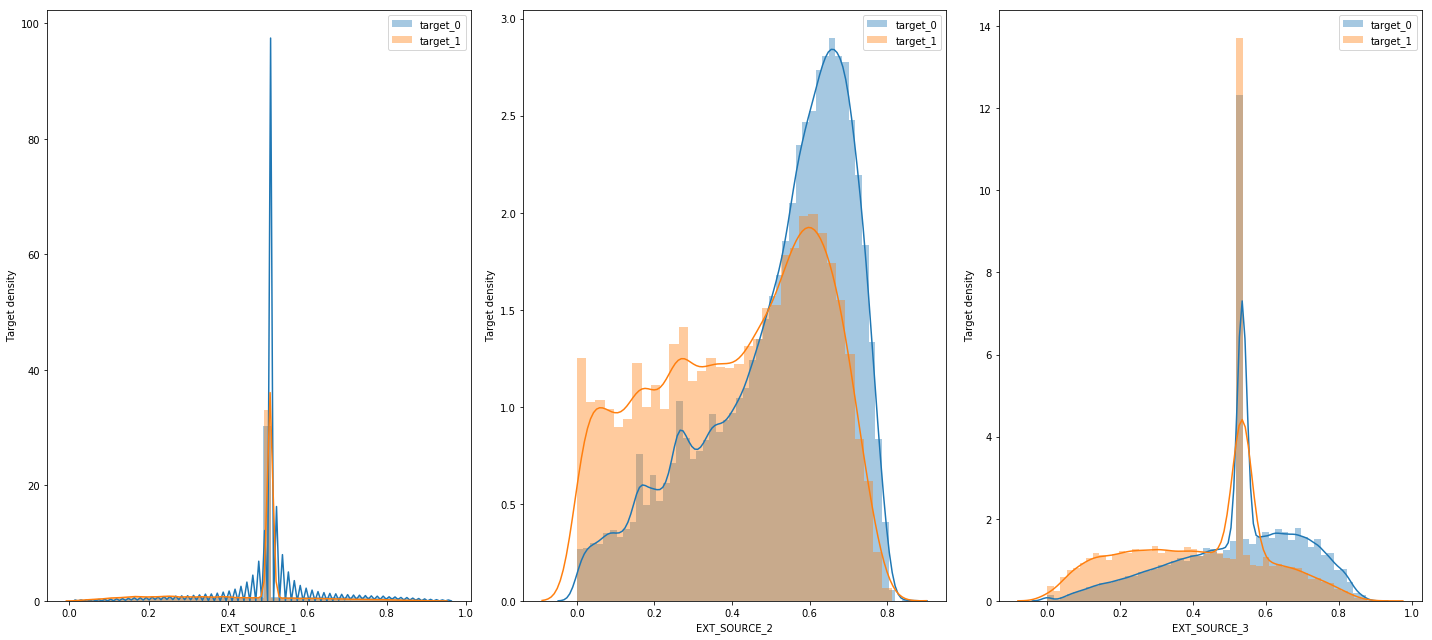

In [41]:
# EXT_SOURCEのヒストグラムを作成
fig, ax = plt.subplots(1, 3, figsize=(20,9))
for i in range(3):
    plt.subplot(1,3,i+1)
    target_0 = df_train["EXT_SOURCE_"+str(i+1)][df_train["TARGET"]==0]
    target_1 = df_train["EXT_SOURCE_"+str(i+1)][df_train["TARGET"]==1]
    sns.distplot(target_0)
    sns.distplot(target_1)
    plt.xlabel("EXT_SOURCE_"+str(i+1))
    plt.ylabel("Target density")
    plt.legend(["target_0","target_1"], loc="best")
plt.tight_layout()
plt.show()

In [42]:
# 相関行列とヒートマップを作成
X_train_corrs = X_train.corr()
X_train_corrs

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.078239,-0.063368,-0.098887,-0.160295,-0.155892
DAYS_BIRTH,-0.078239,1.000000,0.183299,0.362185,0.091947,0.178527
DAYS_EMPLOYED,-0.063368,0.183299,1.000000,0.131939,0.085817,0.087850
EXT_SOURCE_1,-0.098887,0.362185,0.131939,1.000000,0.134993,0.109100
EXT_SOURCE_2,-0.160295,0.091947,0.085817,0.134993,1.000000,0.094147
EXT_SOURCE_3,-0.155892,0.178527,0.087850,0.109100,0.094147,1.000000


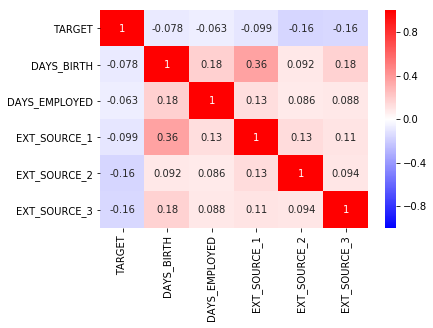

In [43]:
sns.heatmap(X_train_corrs, cmap="bwr", vmin=-1, annot=True)
plt.show()

In [44]:
y_train = X_train["TARGET"]
X_train = X_train[["DAYS_BIRTH","DAYS_EMPLOYED","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]
X_test = X_test[["DAYS_BIRTH","DAYS_EMPLOYED","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]


In [45]:
# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

# 訓練データのランダムフォレストで重要度を算出
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)
rfc.fit(X_train_scaled, y_train)


/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
rfc.feature_importances_

array([0.03033862, 0.08356568, 0.09035896, 0.38625026, 0.40948648])

<IPython.core.display.Javascript object>


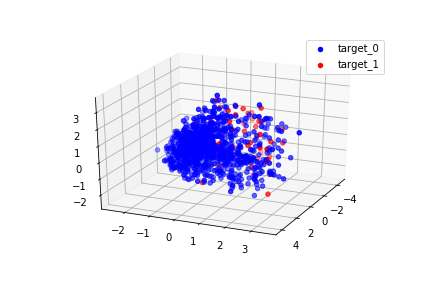

In [48]:
# 上記結果から、3つに特徴量削減
pca = PCA(n_components=3)
pca.fit(X_train_scaled)
X_train_reduced = pca.transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# 訓練データの1000個のデータで3次元プロットしてみる
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
X1, X2, X3 = X_train_reduced[:,0][:1000], X_train_reduced[:,1][:1000], X_train_reduced[:,2][:1000]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X1[y_train[:1000]==0],X2[y_train[:1000]==0],X3[y_train[:1000]==0], 
           color="blue", label="target_0")
ax.scatter(X1[y_train[:1000]==1],X2[y_train[:1000]==1],X3[y_train[:1000]==1], 
           color="red", label="target_1")
plt.legend(loc="best")
plt.show()

In [50]:
lr = LogisticRegression(penalty="l2", C=2)
lr.fit(X_train_reduced, y_train)

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_train, lr.predict_proba(X_train_reduced)[:,1])
print("classifier_auc: {}".format(lr_auc))



classifier_auc: 0.7196258147965269


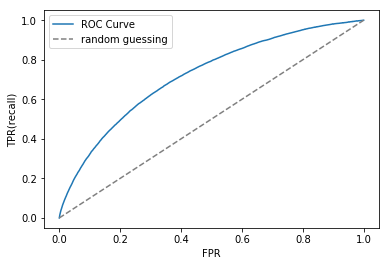

In [52]:
%matplotlib inline
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(X_train_reduced)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1], linestyle="--", color="gray", label="random guessing")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.legend(loc="best")
plt.show()

In [53]:
# 交互作用特徴量を加えてみる
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train_reduced)
X_train_poly = poly.transform(X_train_reduced)
X_test_poly = poly.transform(X_test_reduced)

print("X_train_poly shape: ", X_train_poly.shape)
print("X_test_poly shape: ", X_test_poly.shape)

X_train_poly shape:  (307511, 19)
X_test_poly shape:  (48744, 19)


In [54]:
# 新たな特徴量を加えた内訳
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3']

In [56]:
lr = LogisticRegression(penalty="l2", C=2)
lr.fit(X_train_poly, y_train)

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
# auc算出
lr_auc = roc_auc_score(y_train, lr.predict_proba(X_train_poly)[:,1])
print("classifier_auc: {}".format(lr_auc))

classifier_auc: 0.7220658192028264


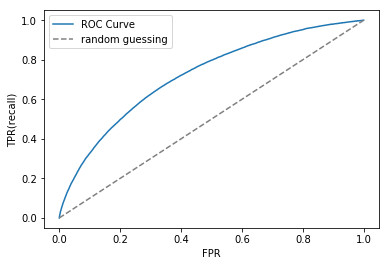

In [58]:
# ROC curve描画
fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(X_train_poly)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1], linestyle="--", color="gray", label="random guessing")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.legend(loc="best")
plt.show()

わずかだが、aucが上昇したので、グリッドサーチと交差検証をしてみる

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression(solver="lbfgs"))])
param_grid = {"lr__C": [0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_poly, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
print("Best cross-val accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

Best cross-val accuracy: 0.92
Best parameters: {'lr__C': 0.1}


In [61]:
y_test_pred = grid.predict_proba(X_test_poly)[:,1]

In [62]:
df_submission = df_test[["SK_ID_CURR"]]
df_submission["TARGET"] = y_test_pred
df_submission.head()

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.047861
1,100005,0.094533
2,100013,0.023523
3,100028,0.062327
4,100038,0.115285


In [63]:
# 検証結果をcsvファイルに保存
df_submission.to_csv("home_credit_submission.csv", index=False)

Kaggle提出結果： 0.71525

時間とCPUの制約上、この時点で提出致します。SVMなどの他の分類器も含めた広範なグリッドサーチ、信用情報自体の知識に基づいた新たな特徴量の生成（特徴量/特徴量など）、カテゴリ変数も含めた豊富な特徴量学習によるモデル構築など、まだまだ改善の余地があるかと思います。